# y= 2x + 1 예측

In [1]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터 
x= np.array([0, 1, 2, 3,4])
y = np.array([1, 3, 5, 7, 9]) # y = x * 2+ 1

#인공신겸아 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행상화 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.999985 8.999976]


#텐서플로로만 구현하는 선형 회귀 예제

In [2]:
# 1. 문제와 정답 데이터 지정
x_train=[1, 2, 3, 4]
y_train=[2, 4, 6, 8]

# 2. 모델 구성(생성)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

# 3. 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈려에 사용할 옵티마이저와 손실함수, 출력 정보를 지정
# Mean Absoulte Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae','mse'])
#모델을 표시 (시각화)
model.summary()

# 4. 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장
history = model.fit(x_train, y_train, epochs=500)
# 5. 테스트 데이터로 성능평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실', model.evaluate(x_test, y_test))

# x = [3.5, 5, 5.5, 6]의 예측
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
# 예측 값만 1차원으로
print(pred.flatten())
print(pred.squeeze())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 83.1095 - mae: 8.3221 - mse: 83.1095
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 57.7195 - mae: 6.9074 - mse: 57.7195
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 40.1017 - mae: 5.7290 - mse: 40.1017
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 27.8767 - mae: 4.7474 - mse: 27.8767
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 19.3938 - mae: 3.9299 - mse: 19.3938
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 13.5073 - mae: 3.2489 - mse: 13.5073
Epoch 

Text(0, 0.5, 'loss')

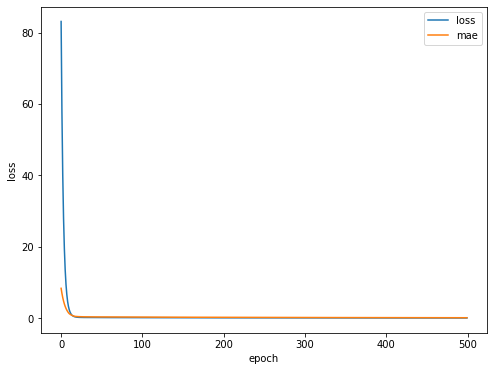

In [3]:
import matplotlib.pylab as plt

#그래프 그리기
fig = plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label = 'mae')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

#그래프 그리기
fig = plt.figure(figsize=(8,6))

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
#버전 1.x만 가능
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. 문제와 정답 데이터 지정
x_train=[1, 2, 3, 4]
y_train=[2, 4, 6, 8]

# 2. 모델 구성(생성)
model = tf.keras.models.Sequential([
     Dense(1, input_shape=(1,), activation='linear')
])

# 3. 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈려에 사용할 옵티마이저와 손실함수, 출력 정보를 지정
# Mean Absoulte Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae','mse'])

#모델을 표시 (시각화)
model.summary()

# 4. 생성된 모델로 훈련 데이터 학습
model.fit(x_train, y_train, epochs=1000)

# 5. 테스트 데이터로 성능평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('정확도:', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 70.3839 - mae: 7.6585 - mse: 70.3839
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 48.8816 - mae: 6.3566 - mse: 48.8816
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 33.9614 - mae: 5.2721 - mse: 33.9614
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 23.6083 - mae: 4.3689 - mse: 23.6083
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 16.4242 - mae: 3.6165 - mse: 16.4242
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 11.4391 - mae: 2.9899 - mse: 11.4391
